<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Synthetic Biomedical Data – Lesson 2: Data Generation Basics
Part of the *Microcredit Artificial Data Generator* module.

➡️ [Back to Lesson 1: Introduction](01_intro.ipynb)
➡️ [Module README](../README.md)

*Before continuing, please ensure you reviewed the prerequisites and learning goals in Lesson 1.*


### Recap from Lesson 1
- Synthetic biomedical data is artificially generated but mimics statistical properties of real datasets.
- It allows us to know the *ground truth* (feature importance, class distributions).
- Useful for benchmarking, teaching, privacy-preserving research.


## Lesson 2: Data Generation Basics

In this notebook, we will move from theory to practice and learn how to **generate synthetic biomedical datasets** using Python.
You will see how simple tools (e.g., `scikit-learn`) can be used to create datasets that mimic the structure of real biomedical data while allowing full control over:

- **Number of samples** (patients, experiments, or observations)
- **Number of features** (biomarkers or measurements)
- **Number of classes** (e.g., healthy vs. diseased groups)
- **Feature importance** (which features carry useful information)
- **Noise and irrelevant features** (variables that add randomness or distraction)

The goal of this lesson is to give you hands-on experience with creating small, controlled datasets that demonstrate the key concepts of synthetic biomedical data.
Later notebooks will expand this by introducing **pseudo-classes**, **random effects**, and more advanced data structures.

---


In [4]:
# Lesson 2: First Example – Generate a simple synthetic dataset

from sklearn.datasets import make_classification
import pandas as pd

# Generate a dataset with:
# - 100 samples (rows, like patients)
# - 5 features (columns, like biomarkers)
# - 2 informative features (really matter for classification)
# - 2 classes (e.g., healthy vs diseased)
X, y = make_classification(
    n_samples=100,
    n_features=5,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Put into a DataFrame for easier handling
feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["class"] = y

# Show first rows
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,class
0,-2.025143,-2.523434,0.633919,-2.058321,0.186454,0
1,0.628346,-1.209464,0.624120,0.778613,-0.012247,1
2,-0.792873,0.736444,-0.530258,1.173294,-0.107030,1
3,-1.867265,-1.268984,2.314659,-1.207572,0.686260,0
4,1.687142,0.556003,-1.081548,0.964233,0.881640,1


Class distribution:
class
0    50
1    50
Name: count, dtype: int64


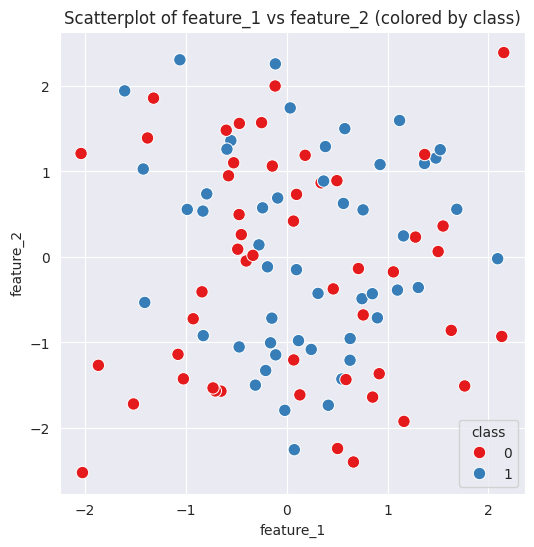

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Show class distribution
print("Class distribution:")
print(df["class"].value_counts())

# 2. Simple scatterplot of two features
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x="feature_1",
    y="feature_2",
    hue="class",
    palette="Set1",
    s=80
)
plt.title("Scatterplot of feature_1 vs feature_2 (colored by class)")
plt.show()


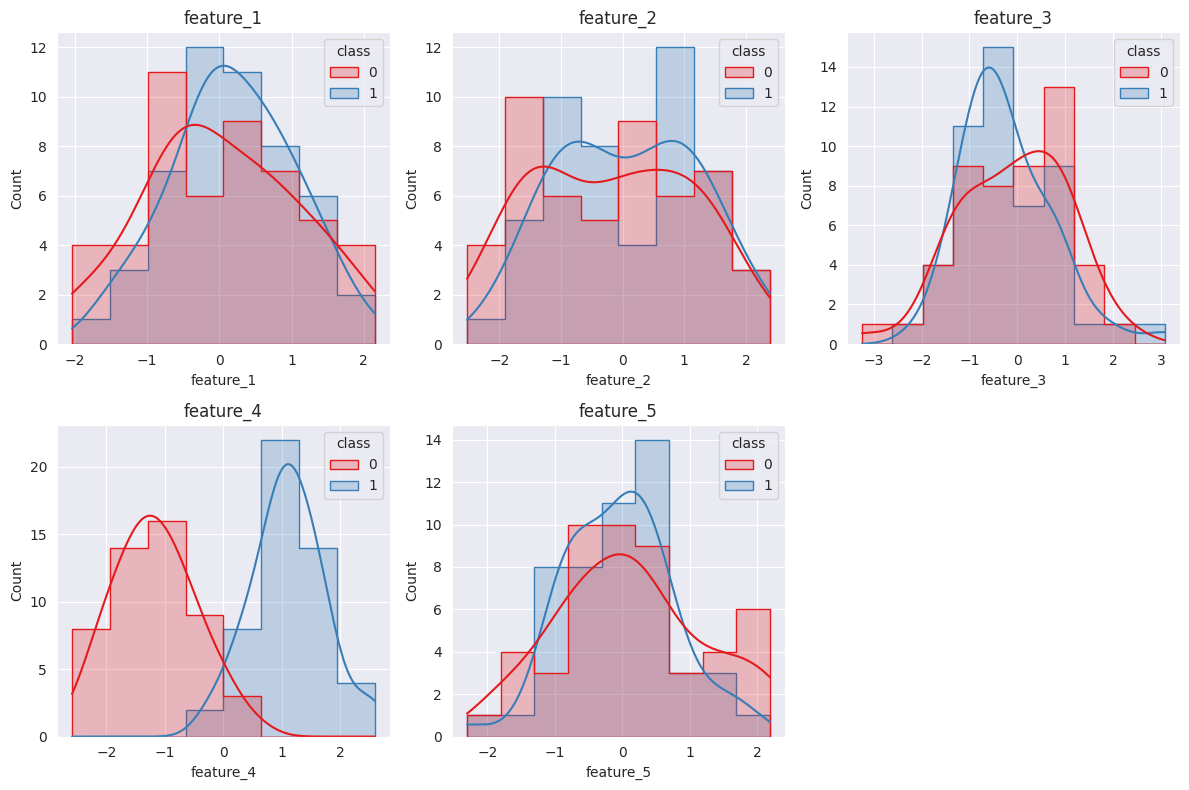

In [6]:
# 3. Visualize feature distributions per class

plt.figure(figsize=(12, 8))

for i, col in enumerate(feature_names, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns of plots
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step", palette="Set1")
    plt.title(col)

plt.tight_layout()
plt.show()
